# 공공데이터 포털 

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('CARD_SPENDING_NIA.txt',sep='\t')
df = df.sort_values('STD_MM')
df = df.reset_index()
df_1 = df.drop(columns = ['index'])

In [137]:
sum(df_1.USE_AMT.value_counts().index)/len(df_1.USE_AMT.value_counts().index)

196969.22830140588

In [39]:
df = []
i = df_1.MCT_CAT_CD.value_counts()
g= i.index
for j in g:
    df.append(df_1.loc[df_1['MCT_CAT_CD']==j,:])

In [46]:
def date_sum_speding(df):
    for i in range(len(df)):
        label = []
        label.append(df[i]['MCT_CAT_CD'].iloc[0])

        df[i] = df[i].groupby(df[i].STD_MM).sum()
        df[i]=df[i].sort_values('STD_MM')
        df[i]=df[i][['USE_AMT']]
        df[i] = df[i].rename(columns = {"USE_AMT":label[0]})

    #     print(label[0])
    for i in range(1,len(df)):
        df[0] = df[0].merge(df[i],how='outer',on='STD_MM')
    return df[0]

In [47]:
df_3 = date_sum_speding(df)

In [49]:
df_3.corr()

,40,80,81,70,71,92,42,50,62,22,...,44,21,52,34,35,43,32,30,60,31
40,1.000000,0.816622,0.648190,0.467930,0.191868,0.480727,0.574378,0.247520,0.700143,0.325746,...,0.801420,0.534197,0.334600,0.321845,0.183060,0.536940,0.464636,0.378051,0.063067,0.293095
80,0.816622,1.000000,0.382773,0.720390,0.354081,0.565200,0.418367,0.374083,0.826480,0.511049,...,0.861080,0.593929,0.402256,0.527317,0.333600,0.528268,0.492521,0.547218,0.311640,0.431093
81,0.648190,0.382773,1.000000,0.306189,-0.307822,-0.089735,0.085677,0.181113,0.373088,0.080948,...,0.409635,0.585331,0.080656,0.201328,-0.279266,0.046161,0.499958,0.190405,-0.102378,0.083069
70,0.467930,0.720390,0.306189,1.000000,0.140097,0.358362,0.085852,0.340833,0.813980,0.224126,...,0.557080,0.697209,0.319428,0.488272,0.187927,0.222903,0.508535,0.476713,0.306703,0.577896
71,0.191868,0.354081,-0.307822,0.140097,1.000000,0.511742,0.218435,0.496836,0.087899,0.222517,...,0.218320,-0.264616,0.459670,0.157351,0.275001,0.336089,-0.254159,0.256566,0.053049,-0.080899
92,0.480727,0.565200,-0.089735,0.358362,0.511742,1.000000,0.755225,0.110152,0.334160,0.418004,...,0.637891,0.152578,0.035576,0.196795,0.144244,0.871527,0.236106,0.445470,0.198945,0.092470
42,0.574378,0.418367,0.085677,0.085852,0.218435,0.755225,1.000000,-0.227594,0.253335,0.208057,...,0.630899,-0.022939,0.017596,0.233568,-0.011820,0.847291,0.310080,0.089792,-0.020687,-0.006100
50,0.247520,0.374083,0.181113,0.340833,0.496836,0.110152,-0.227594,1.000000,0.201551,0.078934,...,0.259823,0.144595,0.351161,0.374149,0.057270,0.146112,0.080816,0.505556,0.344673,-0.112828
62,0.700143,0.826480,0.373088,0.813980,0.087899,0.334160,0.253335,0.201551,1.000000,0.295129,...,0.715205,0.676364,0.351737,0.440533,0.457376,0.294967,0.643154,0.359639,0.432074,0.630583
22,0.325746,0.511049,0.080948,0.224126,0.222517,0.418004,0.208057,0.078934,0.295129,1.000000,...,0.304641,0.196302,0.076860,0.145637,0.256544,0.311528,0.128211,0.259642,0.110254,0.389245


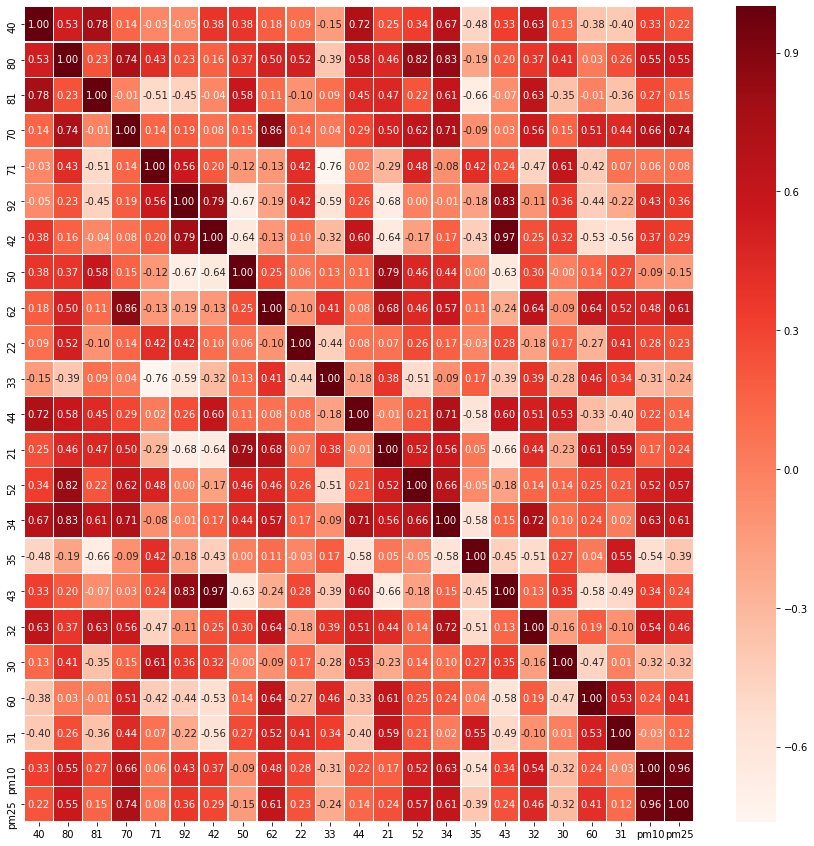

In [259]:
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(data = po.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

In [58]:
man_df = df_1.loc[df_1.SEX_CD=='M',:]
woman_df = df_1.loc[df_1.SEX_CD=='F',:]

In [59]:
 man_df.head(2)

,STD_MM,SIDO_CD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
1,201701,41,135,580,71,M,55,2103,109426
2,201701,41,135,580,71,M,50,3318,154891


In [62]:
woman_df.head(2)

,STD_MM,SIDO_CD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,201701,11,110,515,21,F,20,178,886
9,201701,41,135,580,71,F,65,977,49450


In [65]:
ww = woman_df.groupby('MCT_CAT_CD').sum().drop(columns=['STD_MM','SIDO_CD','GU_CD','DONG_CD','AGE_CD','USE_CNT'])

In [118]:
ww.T.rename(columns=new_dict)

MCT_CAT_CD,21,22,30,31,32,33,34,35,40,42,...,44,50,52,60,62,70,71,80,81,92
USE_AMT,17242299,113392206,87451515,9339308,25123033,654502866,24351953,372222069,6476169436,420865351,...,151535152,378929661,32398512,24433999,171625958,3078826885,844895986,4064561228,695024758,53478510


In [71]:
g = g.replace('\n','')

In [72]:
g = g.replace('(',':')

In [74]:
g = g.replace(')',',')

In [92]:
new_dict = {}
for i in range(len(g)):
    if i%6==0:
        new_dict[g[i-6:i-4]] = g[i-3:i-1]

In [98]:
g= g.split(',')

In [100]:
g=g[:-1]

In [107]:
sd = []
for i in g:
    sd.append(i.split(':'))

In [115]:
new_dict = {}
for i in sd:
    new_dict[i[1]]=i[0]

In [116]:
new_dict

{'42': '의복',
 '43': '직물',
 '44': '신변잡화',
 '50': '서적문구',
 '52': '사무통신',
 '60': '자동차판매',
 '62': '자동차정비',
 '70': '의료기관',
 '71': '보건위생',
 '80': '요식업소',
 '81': '음료식품',
 '92': '수리서비스'}

In [127]:
for i in new_dict.keys():
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [138]:
mi = pd.read_csv('미세먼지_daily.csv')

In [142]:
mi.head()

,date_daily,pm10,noise,temp,humi,pm25,동,serial,label_pm25,label_pm10,구
0,20180401,74.55902777777777,34.77986111111111,16.6592361111111,59.2375,38.94027777777778,상계5동,V10O1610297,2,1,노원구
1,20180401,64.62239221140473,49.46453407510431,16.70312934631431,56.35813630041724,32.648122392211405,"중계2,3동",V10O1611097,1,1,노원구
2,20180401,51.21323011963406,35.88881069669247,17.022871217452426,57.840253342716395,24.96622097114708,하계1동,V10O1610610,1,1,노원구
3,20180401,52.72708333333333,54.077083333333334,17.280972222222236,58.44861111111111,25.711111111111112,공릉1동,V10O1610629,1,1,노원구
4,20180401,63.60380014074595,53.43631245601689,17.675580577058437,56.80506685432794,30.737508796622098,상계2동,V10O1610312,1,1,노원구


In [193]:
dust = mi[['pm10','pm25','date_daily']]

In [194]:
dust = dust.drop(index=5959)

In [195]:
dust = dust.astype(float)

In [196]:
dust['datd_daily'] = dust['date_daily'].astype(str)

In [187]:
dust['date_daily'] = dust['date_daily'].apply(str)

In [213]:
dust['date_daily']=dust['datd_daily'].str[:6].values

In [215]:
dust.drop(columns = ['datd_daily'])

,pm10,pm25,date_daily
0,74.559028,38.940278,201804
1,64.622392,32.648122,201804
2,51.213230,24.966221,201804
3,52.727083,25.711111,201804
4,63.603800,30.737509,201804
5,53.554861,26.158333,201804
6,55.554167,23.335417,201804
7,66.686192,34.669456,201804
8,45.384240,22.085774,201804
9,66.040972,35.491667,201804


In [218]:

dust_month =dust.groupby('date_daily').mean()

In [186]:
for i,v  in enumerate(dust['date_daily'].apply(str)):
    dust['date_daily'].iloc[i] = v[:-4]
    if i%30==0:
        print(i)
#     dust['date_daily'] = i[:-4]

C:\Users\82102\Anaconda3\envs\my_python\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830


KeyboardInterrupt: 

In [183]:
dust.head()

,pm10,pm25,date_daily,datd_daily
0,74.559028,38.940278,20180401.0,20180401.0
1,64.622392,32.648122,20180401.0,20180401.0
2,51.213230,24.966221,20180401.0,20180401.0
3,52.727083,25.711111,20180401.0,20180401.0
4,63.603800,30.737509,20180401.0,20180401.0


In [245]:
dust_month = dust_month.reset_index()

In [246]:
dust_month = dust_month.rename(columns={'date_daily':'STD_MM'})

In [247]:
df_spending=df_3.iloc[15:]

In [248]:
df_spending

,40,80,81,70,71,92,42,50,62,22,...,44,21,52,34,35,43,32,30,60,31
STD_MM,,,,,,,,,,,,,,,,,,,,,
201804,482243611,427062600,49302804,258427369,57369057,6326093,28388068,27063103,29129377,9018007,...,12112054,4611264,3904352,1930419,34892448,5600172,1868774,7482679,3624239,879249
201805,499240544,449628065,51530201,256929864,57441747,6230802,29422299,27265858,29505000,11453958,...,12680239,5132748,3914195,2088548,37579069,6170911,1816345,7615049,3417922,1298236
201806,484505294,430215333,50946757,255041242,56113815,5054173,26606653,25644085,29863454,8505276,...,12359515,5095457,4065639,2028337,37641420,5257918,1683056,7443077,4214753,985284
201807,488666669,433212592,47901285,264262599,57100048,4485504,23797048,30648008,32528662,8648511,...,11780881,5698369,3953268,1893355,56353532,4458655,1909480,7688709,3958225,1442120
201808,465065352,425078671,50577634,258935946,53930237,3983456,18628651,32452751,30625300,9705702,...,11162233,6052252,3893698,1932216,42976591,3761034,1742825,7169602,4593315,1650920
201809,509177013,415668661,63854984,234368504,52868628,3716157,24486562,33107856,28441219,8534437,...,12503645,5477323,3646354,1998756,32305578,4781657,1998175,7215709,3544415,799677
201810,492827434,433723993,53536723,268456740,52824749,5251109,29273233,27640043,31512879,8623214,...,13441982,5315325,3553032,2259056,31243909,5814380,2207039,7695012,4061840,1129409
201811,494013202,426994472,57257385,269686253,52547320,4904326,26815119,27116209,33084552,8862491,...,11748625,5721473,3849690,2176800,32221468,5115164,2243426,6762110,4491981,1212338
201812,516286363,476162233,62378173,285194832,56115464,4666891,24895047,35854925,33327317,9689223,...,13393369,6457673,4688235,2753206,29907107,4853203,2270752,7533474,4235562,1253950


In [249]:
df_spending.index= df_spending.index.astype(str)

In [251]:
po = df_spending.merge(dust_month,how = 'outer',on='STD_MM')

In [254]:
po =po.drop(columns = ['index'])

In [255]:
po

,STD_MM,40,80,81,70,71,92,42,50,62,...,52,34,35,43,32,30,60,31,pm10,pm25
0,201804,482243611.0,427062600.0,49302804.0,258427369.0,57369057.0,6326093.0,28388068.0,27063103.0,29129377.0,...,3904352.0,1930419.0,34892448.0,5600172.0,1868774.0,7482679.0,3624239.0,879249.0,50.494423,25.638004
1,201805,499240544.0,449628065.0,51530201.0,256929864.0,57441747.0,6230802.0,29422299.0,27265858.0,29505000.0,...,3914195.0,2088548.0,37579069.0,6170911.0,1816345.0,7615049.0,3417922.0,1298236.0,48.422787,26.441058
2,201806,484505294.0,430215333.0,50946757.0,255041242.0,56113815.0,5054173.0,26606653.0,25644085.0,29863454.0,...,4065639.0,2028337.0,37641420.0,5257918.0,1683056.0,7443077.0,4214753.0,985284.0,41.183209,26.153642
3,201807,488666669.0,433212592.0,47901285.0,264262599.0,57100048.0,4485504.0,23797048.0,30648008.0,32528662.0,...,3953268.0,1893355.0,56353532.0,4458655.0,1909480.0,7688709.0,3958225.0,1442120.0,32.705484,20.184848
4,201808,465065352.0,425078671.0,50577634.0,258935946.0,53930237.0,3983456.0,18628651.0,32452751.0,30625300.0,...,3893698.0,1932216.0,42976591.0,3761034.0,1742825.0,7169602.0,4593315.0,1650920.0,36.386125,21.268972
5,201809,509177013.0,415668661.0,63854984.0,234368504.0,52868628.0,3716157.0,24486562.0,33107856.0,28441219.0,...,3646354.0,1998756.0,32305578.0,4781657.0,1998175.0,7215709.0,3544415.0,799677.0,31.605835,15.075299
6,201810,492827434.0,433723993.0,53536723.0,268456740.0,52824749.0,5251109.0,29273233.0,27640043.0,31512879.0,...,3553032.0,2259056.0,31243909.0,5814380.0,2207039.0,7695012.0,4061840.0,1129409.0,40.539093,22.416341
7,201811,494013202.0,426994472.0,57257385.0,269686253.0,52547320.0,4904326.0,26815119.0,27116209.0,33084552.0,...,3849690.0,2176800.0,32221468.0,5115164.0,2243426.0,6762110.0,4491981.0,1212338.0,63.338653,36.357024
8,201812,516286363.0,476162233.0,62378173.0,285194832.0,56115464.0,4666891.0,24895047.0,35854925.0,33327317.0,...,4688235.0,2753206.0,29907107.0,4853203.0,2270752.0,7533474.0,4235562.0,1253950.0,60.789951,33.880577
9,201901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.154924,48.957101


In [256]:
po = po.drop(index=[9,10,11])

In [258]:
po.corr()

,40,80,81,70,71,92,42,50,62,22,...,52,34,35,43,32,30,60,31,pm10,pm25
40,1.000000,0.530366,0.779208,0.143657,-0.034980,-0.048980,0.379109,0.383614,0.177023,0.092796,...,0.336082,0.670778,-0.475385,0.328184,0.629099,0.128155,-0.379880,-0.398121,0.328828,0.220182
80,0.530366,1.000000,0.231022,0.736315,0.430101,0.234907,0.163723,0.374182,0.497468,0.515957,...,0.819050,0.829546,-0.194319,0.195067,0.368245,0.412724,0.034936,0.261984,0.547225,0.554992
81,0.779208,0.231022,1.000000,-0.012293,-0.506651,-0.453397,-0.036331,0.579354,0.107220,-0.097689,...,0.215731,0.611454,-0.661973,-0.072886,0.632732,-0.353647,-0.009999,-0.361364,0.270947,0.152152
70,0.143657,0.736315,-0.012293,1.000000,0.141522,0.193607,0.080535,0.153168,0.862070,0.142263,...,0.621439,0.714806,-0.090337,0.025821,0.557184,0.146457,0.509499,0.443550,0.661974,0.735998
71,-0.034980,0.430101,-0.506651,0.141522,1.000000,0.558850,0.196345,-0.122772,-0.125645,0.415922,...,0.484714,-0.084822,0.418058,0.236269,-0.468250,0.609971,-0.421299,0.072101,0.058913,0.078259
92,-0.048980,0.234907,-0.453397,0.193607,0.558850,1.000000,0.786500,-0.667330,-0.185563,0.418508,...,0.003309,-0.007431,-0.179720,0.829334,-0.113119,0.363934,-0.438028,-0.221235,0.429451,0.359968
42,0.379109,0.163723,-0.036331,0.080535,0.196345,0.786500,1.000000,-0.636742,-0.130929,0.104352,...,-0.173413,0.172912,-0.433824,0.974327,0.248521,0.316515,-0.530889,-0.562296,0.372345,0.287624
50,0.383614,0.374182,0.579354,0.153168,-0.122772,-0.667330,-0.636742,1.000000,0.251617,0.056005,...,0.463355,0.436546,0.004395,-0.631804,0.301575,-0.004992,0.140301,0.266370,-0.090635,-0.149006
62,0.177023,0.497468,0.107220,0.862070,-0.125645,-0.185563,-0.130929,0.251617,1.000000,-0.102099,...,0.455499,0.572086,0.105375,-0.242893,0.643766,-0.089845,0.638214,0.518020,0.482995,0.606100
22,0.092796,0.515957,-0.097689,0.142263,0.415922,0.418508,0.104352,0.056005,-0.102099,1.000000,...,0.263477,0.171292,-0.029853,0.279973,-0.183707,0.171380,-0.269696,0.414735,0.281467,0.229580
